#### Unit 1 - Example 1 (NHANES)

The National Health and Nutrition Examination Survey (NHANES) is a survey conducted annually by the US National Center for Health Statistics (NCHS). While the original data uses a survey design that oversamples certain subpopulations, the data have been reweighted to undo oversampling effects and can be treated as if it were a simple random sample from the American population.

The following questions will be explored with the NHANES data:

- At what age do Americans seem to reach full adult height?

- What proportion of Americans age 25 or older have a college degree?

- What is the relationship between education level and income?

- How much more likely is it that someone \textit{not} physically active has diabetes, compared to someone who is active?

The reweighted NHANES data are available from the NHANES package. To view the complete list of study variables and their descriptions, access the NHANES documentation page with \texttt{?NHANES}.

For convenience, descriptions of the variables used in this lab exercise are included below.

`Age`: age in years at screening. Subjects 80 years or older were recorded as 80 years of age.

`Education`: highest educational level of study participant, reported for participants aged 20 years or older. Recorded as either `8th Grade`, `9 - 11th Grade`, `High School`, `Some College`, or `College Grad`.

`Poverty`: a ratio of family income to poverty guidelines. Smaller numbers indicate more poverty; i.e., a number below 1 indicates income below the poverty level.

`Weight`: weight, measured in kilograms.

`Height`: standing height, measured in centimeters.

`Diabetes`: `Yes` if the participant was told by a health professional that they have diabetes, `No` otherwise.

`PhysActive`: coded `Yes` if the participant does moderate or vigorous-intensity sports, fitness, or recreational activities; `No` otherwise. Reported for participants 12 years or older.

We load and print the first six rows of the data as follows as follows:

In [1]:
require(NHANES)
head(NHANES)

Loading required package: NHANES


ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,⋯,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow
51624,2009_10,male,34,30-39,409,White,NA,High School,Married,⋯,No,NA,Yes,Yes,16,8,1,No,Heterosexual,NA
51624,2009_10,male,34,30-39,409,White,NA,High School,Married,⋯,No,NA,Yes,Yes,16,8,1,No,Heterosexual,NA
51624,2009_10,male,34,30-39,409,White,NA,High School,Married,⋯,No,NA,Yes,Yes,16,8,1,No,Heterosexual,NA
51625,2009_10,male,4,0-9,49,Other,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
51630,2009_10,female,49,40-49,596,White,NA,Some College,LivePartner,⋯,No,NA,Yes,Yes,12,10,1,Yes,Heterosexual,NA
51638,2009_10,male,9,0-9,115,White,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Remember to load packages that you might need for this example!

In [2]:
require(dplyr)
require(ggplot2)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggplot2


#### Question 1.

a) Describe in words the distribution of ages for the study participants.

#### Solution:

In order to describe the distribution, we consider both numerical and visual summaries.

In [3]:
#str(NHANES)
summarize(NHANES, mean(Age))
summarize(NHANES,median(Age))
summarize(NHANES,sd(Age))

mean(Age)
36.7421


median(Age)
36


sd(Age)
22.39757


In [4]:
NHANES %>% 
    summarize(min=min(Age), 
              max=max(Age), 
              q1=quantile(Age,p=.25), 
              q3=quantile(Age,p=.75))

min,max,q1,q3
0,80,17,54


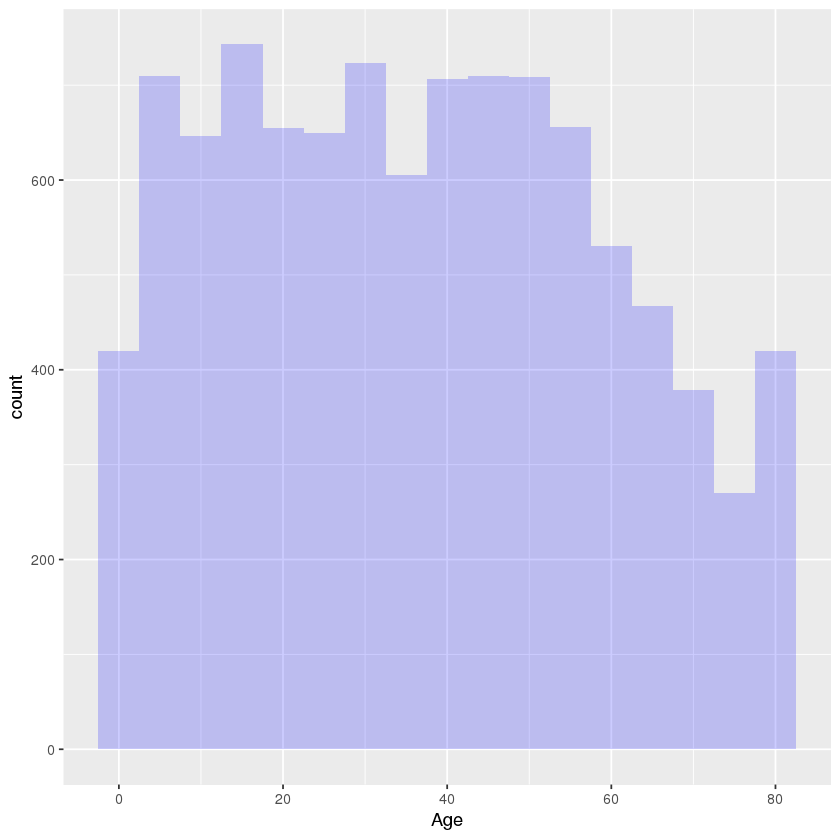

In [5]:
ggplot(data=NHANES,aes(Age)) +
    geom_histogram(binwidth = 5,fill=I("blue"),alpha=I(.2))

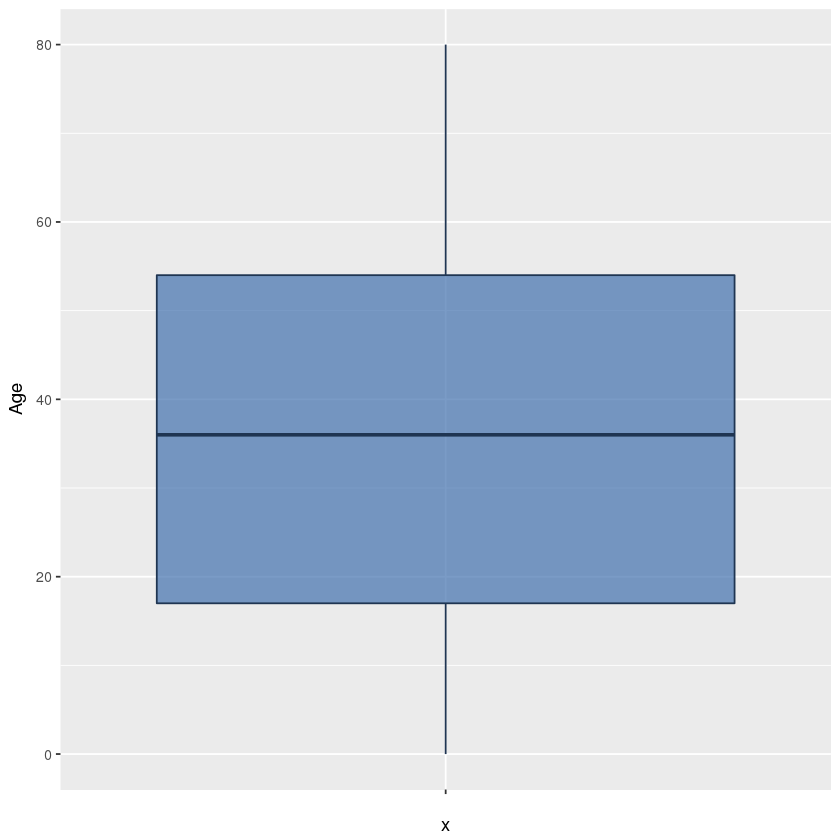

In [6]:
ggplot(data=NHANES,aes(x="", y=Age))+
    geom_boxplot(fill = "#4271AE", colour = "#1F3552", alpha = 0.7)

The distribution of ages is relatively symmetric. 50% of the respondents are below age 36, while the middle 50% of respondents are between ages 17 and 54. Note that the true maximum respondent age is not 80; subjects 80 years or older were recorded as 80 years of age.

b) Using numerical and graphical summaries, describe the distribution of heights among study participants in terms of inches. Note that 1 centimeter is approximately 0.39 inches.

#### Solution:

The first step is to create a new height variable in inches, which we call `HeightInches`:

In [7]:
NHANES = NHANES %>%
    mutate(HeightInches = 0.39*Height)

In [8]:
NHANES %>% 
    summarize(min=min(HeightInches,na.rm="TRUE"), 
              max=max(HeightInches,na.rm="TRUE"), 
              mean=mean(HeightInches,na.rm="TRUE"),
              median=median(HeightInches,na.rm="TRUE"),
              sd=sd(HeightInches,na.rm="TRUE"),
              q1=quantile(HeightInches,p=.25,na.rm="TRUE"), 
              q3=quantile(HeightInches,p=.75,na.rm="TRUE"))

min,max,mean,median,sd,q1,q3
32.604,78.156,63.13236,64.74,7.872761,61.152,68.055


Warning message:
“Removed 353 rows containing non-finite values (stat_bin).”

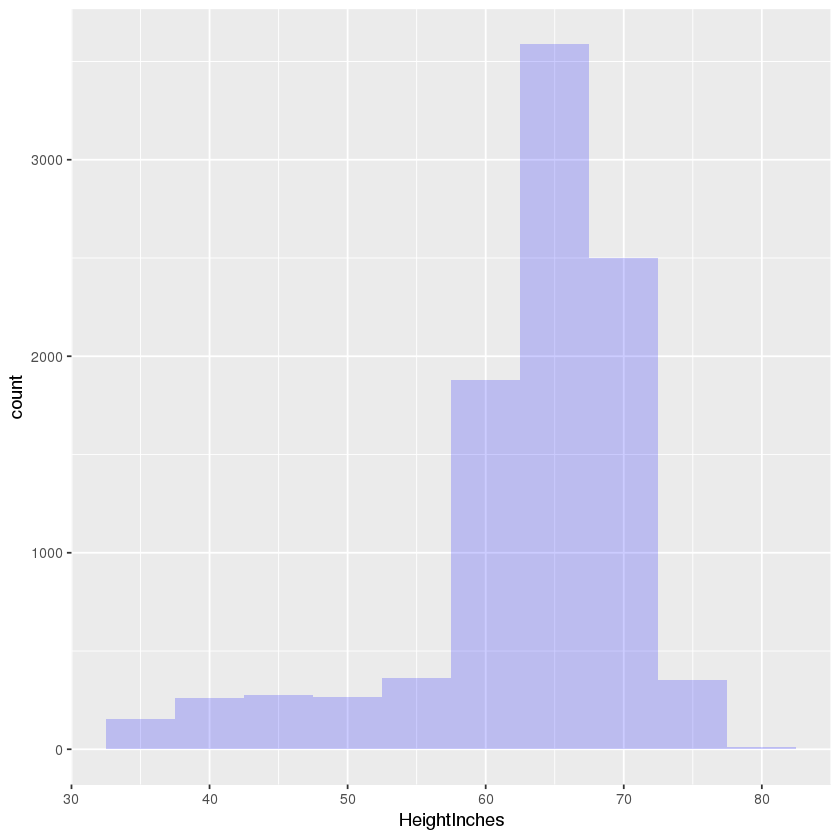

In [9]:
ggplot(data=NHANES,aes(HeightInches)) +
    geom_histogram(binwidth = 5,fill=I("blue"),alpha=I(.2))

Warning message:
“Removed 353 rows containing non-finite values (stat_boxplot).”

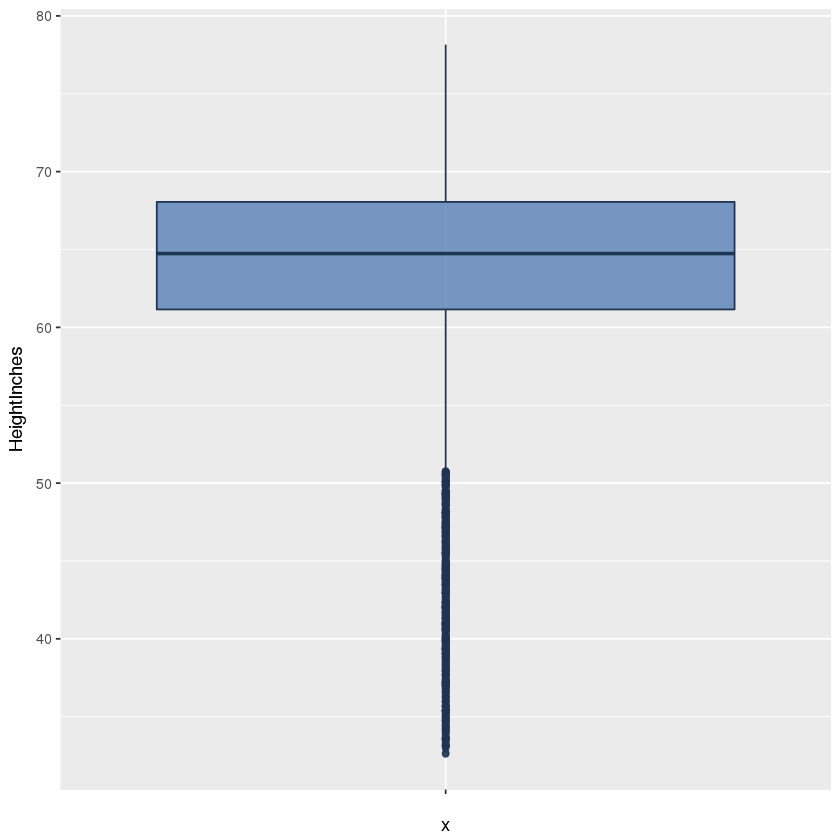

In [10]:
ggplot(data=NHANES,aes(x="", y=HeightInches))+
    geom_boxplot(fill = "#4271AE", colour = "#1F3552", alpha = 0.7)

The distribution of heights among study participants is highly left skewed; there are many more individuals with high values for height than there are for lower values. The median height is about 65 inches (~5.5 feet) and the IQR is 7 inches. $50\%$ of the study participants have an observed height between 61 and 68 inches. The boxplot indicates the left skewed distribution as a series of dots on the lower end of the plot.

c) Use the following code to draw a random sample of 200 participants from the entire dataset. Using the random sample, `nhanes.samp`, investigate at which age people generally reach their adult height. Is it possible to do the same for weight; why or why not?

In [11]:
set.seed(5011)
nhanes.samp <- sample_n(NHANES, 200, replace = FALSE)

#### Solution:

To answer this question, we begin by visualizing the relationship between age and height using a scatterplot:

Warning message:
“Removed 10 rows containing missing values (geom_point).”

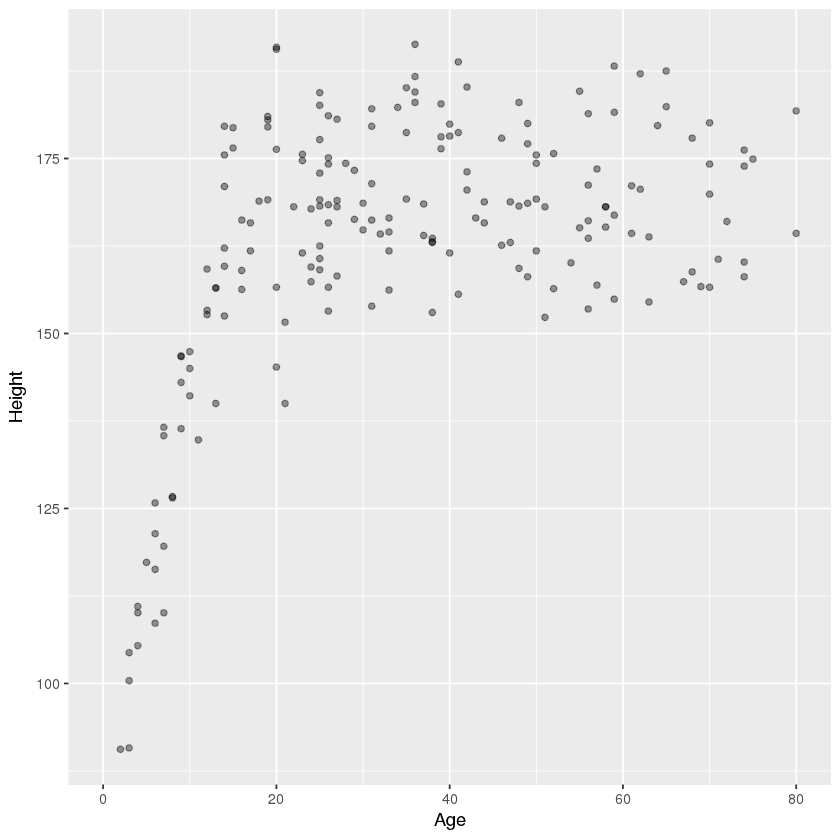

In [12]:
ggplot(data=nhanes.samp,aes(x=Age, y=Height))+
    geom_point(alpha = 0.4) 

The scatterplot shows that people generally reach their adult height around age 20. It is not possible to do the same for weight, since unlike height, weight can fluctuate throughout adulthood, as seen in the scatterplot for age and weight:

Warning message:
“Removed 2 rows containing missing values (geom_point).”

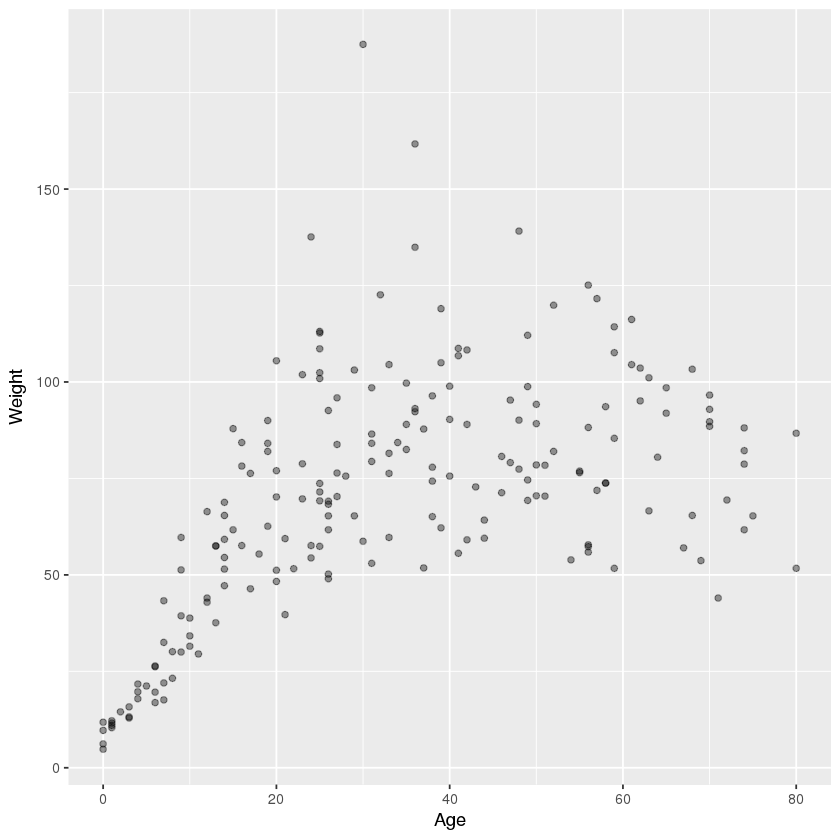

In [13]:
ggplot(data=nhanes.samp,aes(x=Age, y=Weight))+
    geom_point(alpha = 0.4) 

#### Question 2.

a) Calculate the median and interquartile range of the distribution of the variable `Poverty`. Write a sentence explaining the median in the context of these data.



#### Solution:

In [14]:
NHANES %>% 
    summarize(median=median(Poverty,na.rm="TRUE"),
              IQR=quantile(Poverty,p=.75,na.rm="TRUE")-quantile(Poverty,p=.25,na.rm="TRUE"))

median,IQR
2.7,3.47


The median income level is 2.7 times the poverty level, and the IQR is 3.47. The median indicates that 50% of surveyed individiuals have a poverty ratio above 2.7, and 50% have a poverty ratio above 2.7.

b) Compare the distribution of `Poverty` across each group in `Education` among adults (defined as individuals 25 years of age or older). Describe any trends or interesting observations.

#### Solution:

The first step is to filter the data to only include individuals 25 years of age or older:

In [15]:
adults = filter(NHANES, Age >= 25)
head(adults)

ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,⋯,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow,HeightInches
51624,2009_10,male,34,30-39,409,White,NA,High School,Married,⋯,NA,Yes,Yes,16,8,1,No,Heterosexual,NA,64.233
51624,2009_10,male,34,30-39,409,White,NA,High School,Married,⋯,NA,Yes,Yes,16,8,1,No,Heterosexual,NA,64.233
51624,2009_10,male,34,30-39,409,White,NA,High School,Married,⋯,NA,Yes,Yes,16,8,1,No,Heterosexual,NA,64.233
51630,2009_10,female,49,40-49,596,White,NA,Some College,LivePartner,⋯,NA,Yes,Yes,12,10,1,Yes,Heterosexual,NA,65.676
51647,2009_10,female,45,40-49,541,White,NA,College Grad,Married,⋯,NA,No,Yes,13,20,0,Yes,Bisexual,NA,65.013
51647,2009_10,female,45,40-49,541,White,NA,College Grad,Married,⋯,NA,No,Yes,13,20,0,Yes,Bisexual,NA,65.013


Warning message:
“Removed 490 rows containing non-finite values (stat_boxplot).”

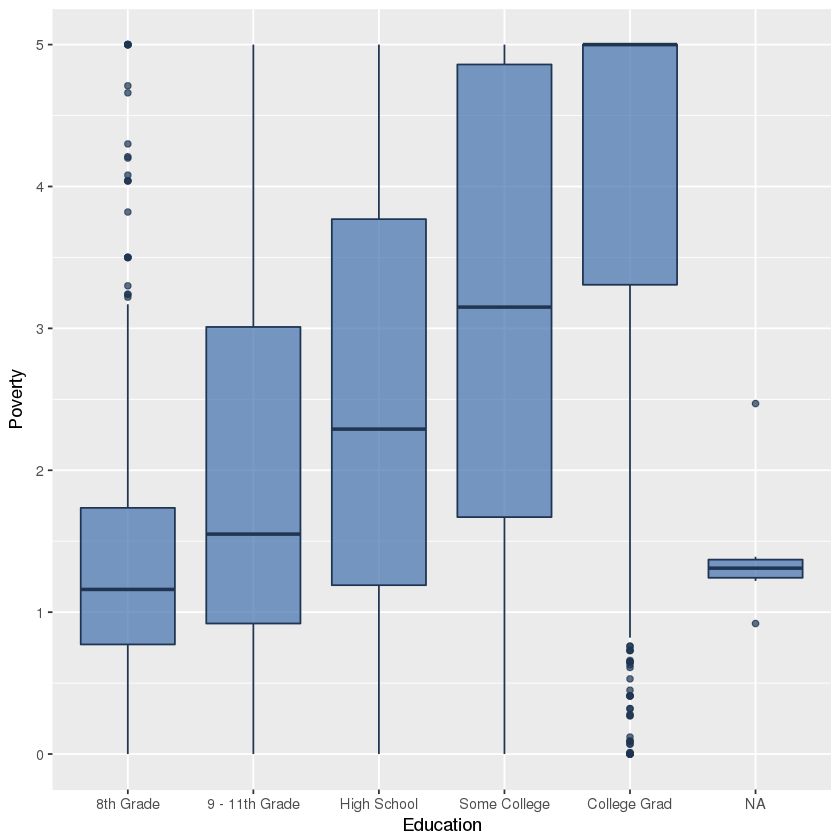

In [16]:
ggplot(data=adults,aes(x=Education, y=Poverty))+
    geom_boxplot(fill = "#4271AE", colour = "#1F3552", alpha = 0.7)

The median level of poverty increases as the highest level of education completed increases. While individuals who only completed 8th grade have median poverty around 1.1, individuals who have college degrees have median poverty at 5. The data also show that some individuals who only completed 8th grade are relatively wealthy, while some individuals with college degrees have incomes below the poverty level.

#### Question 3.

a) What proportion of Americans at least 25 years of age are college graduates?

#### Solution:

First we determine the total number of adults in our sample to be 6571:

In [17]:
dim(adults)

[1] 6571   77

The number of these individuals who are college graduates is 2016:

In [18]:
adults %>% 
    count(Education)

Education,n
8th Grade,435
9 - 11th Grade,814
High School,1345
Some College,1951
College Grad,2016
NA,10


Therefore the proportion of adults who are college graduates is $2016/6571 = 30.7\%$.  Note that this assumes that the distribution of education levels among those individuals who are missing this value (`NA`) is the same as the distribtuion of education levels among those individuals for whom we observe their education levels.

In [19]:
2016/6571

[1] 0.3068026

b) What proportion of Americans with a high school degree are college graduates?

#### Solution:

Assuming that all students in college have a high school degree, the proportion of Americans with a high school degree that are college graduates is 0.380:

In [20]:
2016/(2016+1951+1345)

[1] 0.3795181

#### Question 4.

a) Construct a two-way table, with `PhysActive` as the row variable and `Diabetes` as the column variable. Among participants who are not physically active, what proportion have diabetes? What proportion of physically active participants have diabetes?

#### Solution:

The first step is to create a 2 by 2 table to determine the counts:

In [21]:
require(tidyr)
NHANES %>%
    count(PhysActive,Diabetes) %>%
    spread(key=Diabetes,value=n)

Loading required package: tidyr


PhysActive,No,Yes,<NA>
No,3203,472,2
Yes,4361,285,3
NA,1534,3,137


Next we calculat the proportions:

In [22]:
NonActiveDIAB = 472/(3203+472)
ActiveDIAB = 285/(4361+285)
NonActiveDIAB
ActiveDIAB

[1] 0.1284354

[1] 0.06134309

Among participants who are not physically active, 0.3 have diabetes while 0.06 of participants who are physically active have diabetes.

b) In this context, relative risk is the ratio of the proportion of participants who have diabetes among those who are not physically active to the proportion of participants with diabetes among those physically active. Relative risks greater than 1 indicate that people who are not physically active seem to be at a higher risk for diabetes than physically active people. Calculate the relative risk of diabetes for the participants.

From these calculations, is it possible to conclude that being physically active reduces one's chance of becoming diabetic?

#### Solution:

The relative risk can be calculated using the variable created in part (a):

In [23]:
rrDIAB = NonActiveDIAB/ActiveDIAB
rrDIAB

[1] 2.093722

The relative risk of diabetes is 2.09. From these data, individuals who are not physically active are twice as likely as those who are physically active to have diabetes. However, this is not sufficient to make a causal claim about the relationship between physical activity and diabetes incidence.